# Shallow Machine Learning Introduction

#### Statistics is the work horse in machine learning.

## Shallow learning
- scikit-learn (a.k.a. sklearn)

## Catagories

| Regression | Classification | Clustering | Dimension Reduction|
| :-: | :-: | :-: | :-: |
| **Linear** | Logistic Regression | K-means | Principle Component Analysis |
| Polynomial | Support Vector Machine | Mean-Shift | Linear Discriminant Analysis |
| StepWise | Naive Bayes | DBScan | Gernalized Discriminant Analysis |
| Ridge | Nearest Neighbor | Agglomerative Hierachcial | Autoencoder |
| Lasso | Decision Tree | Spectral Clustering | Non-Negative Matrix Factorization |
| ElasticNet | Random Forest | Gaussian Mixture | UMAP |

## Linear Regression Refresher

**Idea**: Optimize the orientation of a line (i.e. the slope and y-intercept) that best fits coupled parameters (e.g. vaccination effectiveness as a function of dosage).

The equation that defines a line is 

$y = m*x + b$

where m is the slope and b is the y-intercept.


- A simple, but prevelent technique in machine learning

- Used in often in supervised learning


Additional Info: https://en.wikipedia.org/wiki/Linear_regression

## Learning by example

**Example data**: housing prices across the United States

source: https://github.com/whoparthgarg/House-Price-Prediction (and https://www.kaggle.com/vedavyasv/usa-housing)

- **Avg. Area Income**: Avgerage income of city's residents where the house is located in
- **Avg. Area House Age**: Avgerage age of houses within the same city
- **Avg. Area Number of Rooms**: Avgerage number of rooms for houses within the same city
- **Avg. Area Number of Bedrooms**: Avgerage number of bedrooms for houses within the same city
- **Area Population**: Population of city where the house is located in
- **Price**: Price of the house
- **Address**: Address for the house

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
!head -2 usa_housing.csv

Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674


In [3]:
headers = ['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address']

housing = pd.read_csv('usa_housing.csv', header=1, names=headers)
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
housing.describe()

,income,age,rooms,bedrooms,population,price
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03
mean,68580.916075,5.977281,6.987788,3.981308,36166.131905,1.232107e+06
std,10657.929222,0.991547,1.005934,1.234260,9924.919201,3.531445e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61479.919569,5.322279,6.299156,3.140000,29406.506987,9.975356e+05
50%,68803.552077,5.970953,7.002864,4.050000,36200.372388,1.232872e+06
75%,75781.478131,6.650870,7.666100,4.490000,42865.210579,1.471389e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Plot how the different features correlate with the price:

- Using Pandas's built in plot function, we can do this quickly:

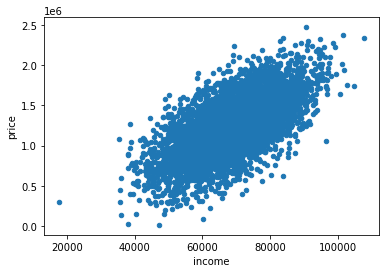

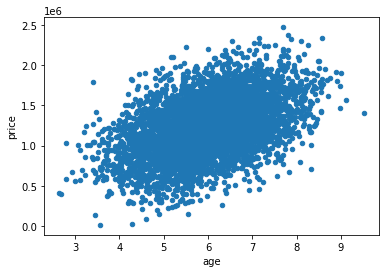

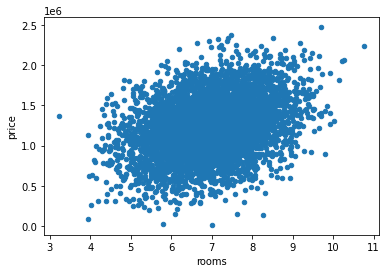

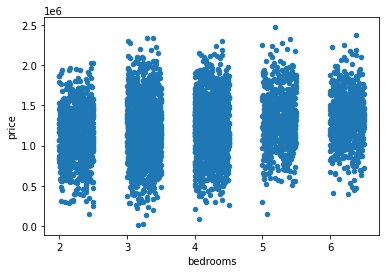

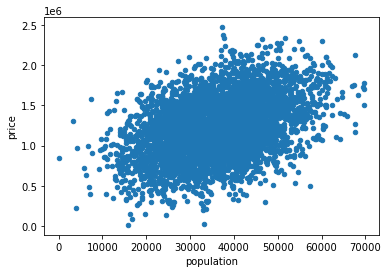

In [5]:
for feature in headers[0:-2]:
    housing.plot(x=feature, y='price', kind='scatter')

---
## Linear Regression on a Single Feature (i.e. 1D)

The simplest scenario is to focus upon 1 feature (i.e. rooms) and see if we can create a model that allows us to predict a house price based on the number of rooms.

In [6]:
target = housing['price'].values
features = housing['rooms'].values

### Training and Testing

- Good data scholarship means we need to split our data into a training and test sets. We do this by using the following scikit-learn funtion:

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

- Returns: a list containing train-test split of the data input.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

Let's double check the algorithm - we should have 25% of the data being researved for the future testing.

In [8]:
print(f'Length of the training data: {len(target_train)}')
print(f'Length of the test data: {len(target_test)}')

print(f'Percentage of data used for the test data set: '
      f'{len(target_test) / (len(target_train) + len(target_test)):0.2f}')

Length of the training data: 3749
Length of the test data: 1250
Percentage of data used for the test data set: 0.25


#### Understanding what the output is
- Let's look at the data, and see what shape the Numpy arrays are:

In [9]:
features_train

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362])

In [10]:
features_train.shape

(3749,)

In [11]:
target_train

array([1334537.42355949, 1310764.11188294,  736798.533309  , ...,
       1265180.90891648,  997618.67976942,  809089.6719455 ])

In [12]:
target_train.shape

(3749,)

#### Visualize the data
Let's plot the house cost versus the number of rooms to get a visual understanding of the data:

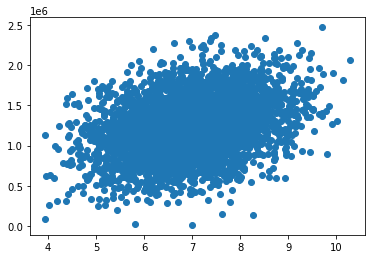

In [13]:
plt.figure()
plt.scatter(features_train, target_train)
plt.show()

#### Reshape the data
- scikit-learn's LinearRegression requires the data to have a certain Numpy array shape
- the `target_train` and `target_test` are both already in their correct shape
- However, since we only only one feature (i.e. one column -> number of rooms), the feature containing arrays need to be reshpaed to contain nested lists:

In [14]:
features_train

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362])

**Note:** If we do not reshape the data, then in the next step (i.e. `model = reg.fit(X=features_train, y=target_train)`) we would obtain the following error:

`ValueError: Expected 2D array, got 1D array instead:
array=[7.76350224 6.67325638 6.39398078 ... 6.11019169 7.04733826 5.35511362].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.`

Numpy's reshape function: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
- the `-1`: a wildcard that specifies an unknown dimension, for which we will have numpy figure it out automatically
    - "One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions."

In [20]:
## Note: the following two are equivalent statments
features_train = np.reshape(features_train, (-1, 1))
# features_train = features_train.reshape(-1, 1)

features_train

array([[7.76350224],
       [6.67325638],
       [6.39398078],
       ...,
       [6.11019169],
       [7.04733826],
       [5.35511362]])

In [21]:
features_test = features_test.reshape(-1, 1)
features_test

array([[6.57676266],
       [7.47055751],
       [7.09271404],
       ...,
       [7.33598472],
       [5.96123976],
       [7.05452948]])

### Least Squared Linear Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

`sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)`

We will train in two steps
1. Define our **model** to be a linear regression
1. Have the model **learn** from our data (i.e. optimize for a best fit) 

But one could combine them to `reg = LinearRegression().fit(X, y)`

**Learn / fit** our data, and thus creating a **model** that represents our training data:

In [17]:
reg = LinearRegression(fit_intercept=True, normalize=True)

In [18]:
model = reg.fit(X=features_train, y=target_train)

To obtain the weights (a.ka. coefficients) for each feature (i.e. currently only for rooms):

In [19]:
model.coef_

array([117401.49443501])

#### Evaluate the fit using $R^2$ goodness-of-fit

Two ways to obtain this value:
1. score
2. r2_score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

    "**Best possible score is 1.0** and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0."

In [22]:
model.score(X=features_test, y=target_test)

0.1173486982720563

In [23]:
predict = model.predict(X=features_test)

In [24]:
r2_score(y_true=target_test, y_pred=predict, multioutput='uniform_average')

0.1173486982720563

#### Overlay the scattered data with the linear regression prediction

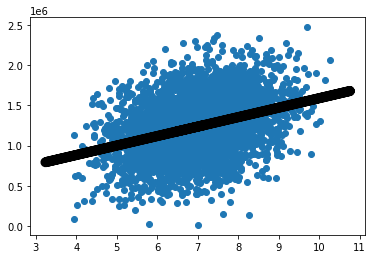

In [25]:
plt.figure()
plt.scatter(features_train, target_train)
plt.plot(features_test, predict, color='black', linewidth=10, linestyle='solid')
plt.show()

## The next step:
- How does one doe this using multiple features (i.e. in multiple dimensional space)?
- Let's generate a model that uses 'income', 'age', 'rooms', 'bedrooms' and 'population' to make a prediction